<a href="https://colab.research.google.com/github/kxni23/ITA0636-Machine-Learning/blob/main/ml_day_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First five rows of the dataset:
     make     model  year  engine_size  num_doors  price
0  Toyota     Camry  2018          2.5          4  22000
1   Honda    Accord  2017          2.4          4  21000
2    Ford   Mustang  2019          3.7          2  26000
3     BMW  3 Series  2020          2.0          4  35000
4    Audi        A4  2021          2.0          4  37000

Basic statistical computations:
              year  engine_size  num_doors         price
count     5.000000     5.000000   5.000000      5.000000
mean   2019.000000     2.520000   3.600000  28200.000000
std       1.581139     0.697854   0.894427   7395.944835
min    2017.000000     2.000000   2.000000  21000.000000
25%    2018.000000     2.000000   4.000000  22000.000000
50%    2019.000000     2.400000   4.000000  26000.000000
75%    2020.000000     2.500000   4.000000  35000.000000
max    2021.000000     3.700000   4.000000  37000.000000

Columns and their data types:
make            object
model           object
yea

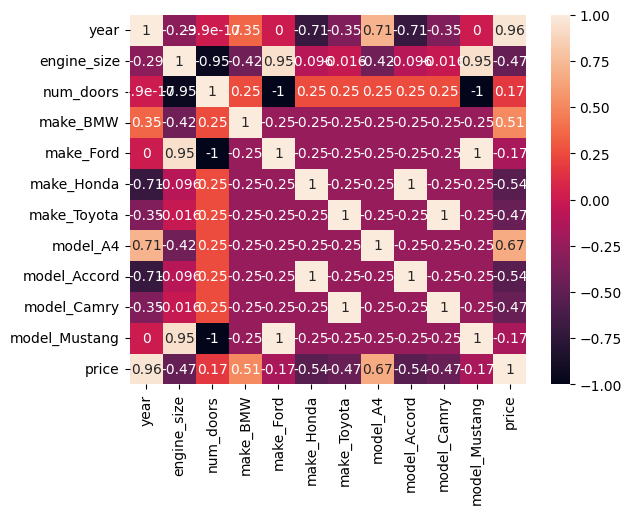


Accuracy of the model:
0.0


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# a) Read the dataset using the Pandas module
# Assuming we have a CSV file named 'car_prices.csv'
# df = pd.read_csv('car_prices.csv')

# For demonstration, let's create a sample dataframe
data = {
    'make': ['Toyota', 'Honda', 'Ford', 'BMW', 'Audi'],
    'model': ['Camry', 'Accord', 'Mustang', '3 Series', 'A4'],
    'year': [2018, 2017, 2019, 2020, 2021],
    'engine_size': [2.5, 2.4, 3.7, 2.0, 2.0],
    'num_doors': [4, 4, 2, 4, 4],
    'price': [22000, 21000, 26000, 35000, 37000]
}
df = pd.DataFrame(data)

# b) Print the 1st five rows
print("First five rows of the dataset:")
print(df.head())

# c) Basic statistical computations on the dataset
print("\nBasic statistical computations:")
print(df.describe())

# d) The columns and their data types
print("\nColumns and their data types:")
print(df.dtypes)

# e) Detects null values in the dataset. If there are any null values, replace them with mode value
print("\nChecking for null values:")
print(df.isnull().sum())

# In this example, there are no null values. If there were, we would replace them as follows:
# for column in df.columns:
#     if df[column].isnull().sum() > 0:
#         mode_value = df[column].mode()[0]
#         df[column].fillna(mode_value, inplace=True)

# f) Explore the dataset using a heatmap
print("\nHeatmap of the dataset:")
# Converting categorical columns to numeric using one-hot encoding
df_numeric = pd.get_dummies(df.drop('price', axis=1), drop_first=True)
df_numeric['price'] = df['price']
sns.heatmap(df_numeric.corr(), annot=True)
plt.show()

# g) Split the data into test and train sets
X = df.drop('price', axis=1)
# Convert categorical variables to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# h) Fit the model into Naive Bayes Classifier
model = GaussianNB()
model.fit(X_train, y_train)

# i) Predict the model
y_pred = model.predict(X_test)

# j) Find the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy of the model:")
print(accuracy)


In [8]:
import pandas as pd

# Define the dataset
data = {
    'Origin': ['Japan', 'Japan', 'Japan', 'USA', 'Japan'],
    'Manufacturer': ['Honda', 'Toyota', 'Toyota', 'Chrysler', 'Honda'],
    'Color': ['Blue', 'Green', 'Blue', 'Red', 'White'],
    'Decade': ['1980', '1970', '1990', '1980', '1980'],
    'Type': ['Economy', 'Sports', 'Economy', 'Economy', 'Economy'],
    'Example Type': ['Positive', 'Negative', 'Positive', 'Negative', 'Positive']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Function to implement Find-S algorithm
def find_s_algorithm(df):
    # Initialize the most specific hypothesis
    hypothesis = ['ϕ'] * (df.shape[1] - 1)

    # Iterate through the dataset
    for i in range(df.shape[0]):
        if df.iloc[i]['Example Type'] == 'Positive':
            if hypothesis == ['ϕ'] * (df.shape[1] - 1):
                hypothesis = list(df.iloc[i][:-1])
            else:
                for j in range(len(hypothesis)):
                    if hypothesis[j] != df.iloc[i, j]:
                        hypothesis[j] = '?'
    return hypothesis

# Apply the Find-S algorithm to the dataset
hypothesis = find_s_algorithm(df)

# Output the most specific hypothesis
print("The most specific hypothesis is:", hypothesis)

The most specific hypothesis is: ['Japan', '?', '?', '?', 'Economy']


Train MSE: 24.125995439736805
Test MSE: 25.7136695038184
Train R2 Score: 0.9942709761929696
Test R2 Score: 0.9944791639465156


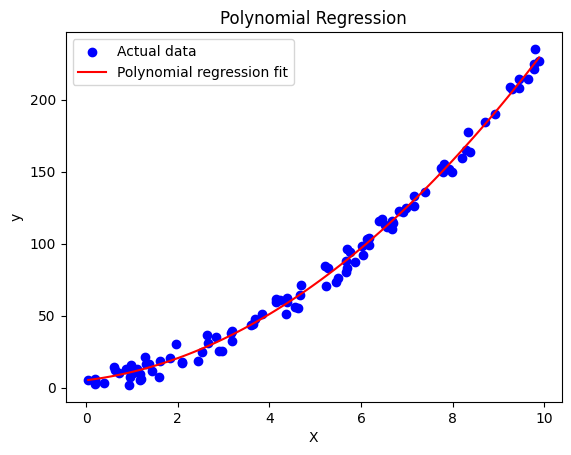

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Generate a synthetic dataset
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # Feature matrix
y = 2 * (X ** 2) + 3 * X + 5 + np.random.randn(100, 1) * 5  # Target vector

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Step 3: Preprocess the data to include polynomial features
poly = PolynomialFeatures(degree=2)  # Try different degrees for different results
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Step 4: Fit a polynomial regression model
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Step 5: Predict and evaluate the model
y_train_pred = model.predict(X_poly_train)
y_test_pred = model.predict(X_poly_test)

# Performance metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train R2 Score: {train_r2}")
print(f"Test R2 Score: {test_r2}")

# Step 6: Visualize the results
plt.scatter(X, y, color='blue', label='Actual data')
X_range = np.linspace(min(X), max(X), 100).reshape(-1, 1)
y_range_pred = model.predict(poly.transform(X_range))
plt.plot(X_range, y_range_pred, color='red', label='Polynomial regression fit')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



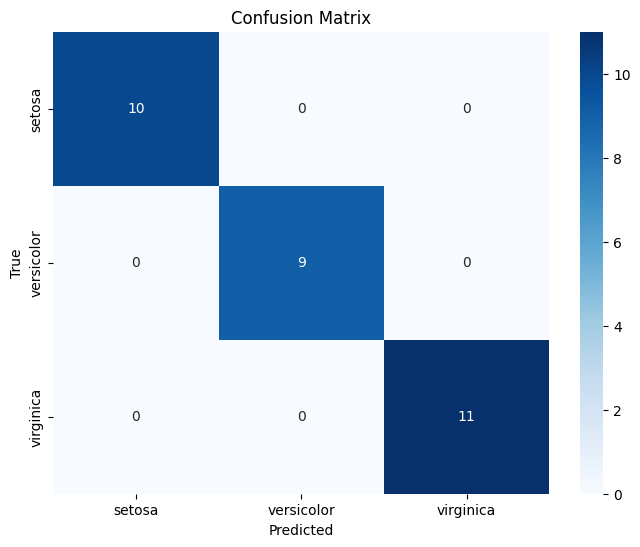

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

# Step 2: Preprocess the data (if necessary)
# In this case, the Iris dataset is already clean and ready to use.

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Fit a KNN model to the training data
k = 3  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Step 5: Predict the labels for the test data
y_pred = knn.predict(X_test)

# Step 6: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

First five rows of the dataset:
  Occupation  Credit Score
0   Engineer           720
1     Doctor           680
2     Artist           650
3   Engineer           700
4     Artist           710

Basic statistical computations:
       Credit Score
count      10.00000
mean      693.00000
std        35.91657
min       640.00000
25%       665.00000
50%       695.00000
75%       717.50000
max       750.00000

Columns and their data types:
Occupation      object
Credit Score     int64
dtype: object

Null values in the dataset:
Occupation      0
Credit Score    0
dtype: int64

Null values after insertion:
Occupation      0
Credit Score    1
dtype: int64

Dataset after handling null values:
  Occupation  Credit Score
0   Engineer         720.0
1     Doctor         680.0
2     Artist         640.0
3   Engineer         700.0
4     Artist         710.0
5     Doctor         690.0
6   Engineer         730.0
7     Artist         640.0
8     Doctor         660.0
9   Engineer         750.0


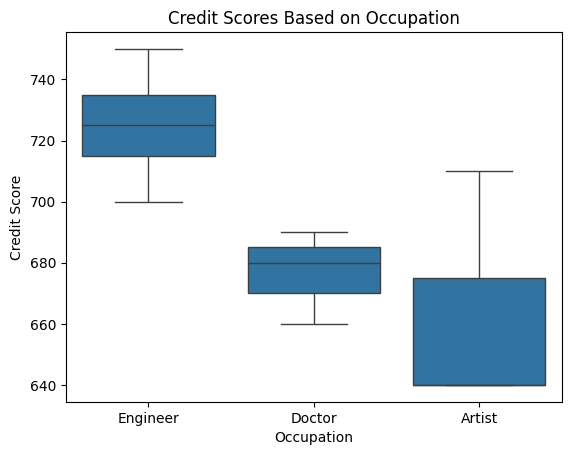


Predicted values for the test set:
[690. 690.]
Model Accuracy: 0.0


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Step 1: Load the dataset
data = {
    'Occupation': ['Engineer', 'Doctor', 'Artist', 'Engineer', 'Artist', 'Doctor', 'Engineer', 'Artist', 'Doctor', 'Engineer'],
    'Credit Score': [720, 680, 650, 700, 710, 690, 730, 640, 660, 750]
}
df = pd.DataFrame(data)

# a. Print the first five rows
print("First five rows of the dataset:")
print(df.head())

# b. Basic statistical computations
print("\nBasic statistical computations:")
print(df.describe())

# c. The columns and their data types
print("\nColumns and their data types:")
print(df.dtypes)

# d. Detect and handle null values
print("\nNull values in the dataset:")
print(df.isnull().sum())

# As an example, let's manually insert a null value and then handle it
df.at[2, 'Credit Score'] = None
print("\nNull values after insertion:")
print(df.isnull().sum())

# Replace null values with the mode
mode_value = df['Credit Score'].mode()[0]
df['Credit Score'].fillna(mode_value, inplace=True)
print("\nDataset after handling null values:")
print(df)

# e. Explore the dataset using a box plot
sns.boxplot(x='Occupation', y='Credit Score', data=df)
plt.title('Credit Scores Based on Occupation')
plt.show()

# f. Split the dataset into train and test sets
X = pd.get_dummies(df['Occupation'], drop_first=True)  # One-hot encoding for categorical variable
y = df['Credit Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# g. Fit the Naive Bayes classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

# i. Predict the model
y_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("\nPredicted values for the test set:")
print(y_pred)
print(f"Model Accuracy: {accuracy}")


In [4]:
import pandas as pd
import numpy as np

# Sample training data as a list of dictionaries
data = [
    {'Origin': 'Japan', 'Manufacturer': 'Honda', 'Color': 'Blue', 'Decade': '1980', 'Type': 'Economy', 'Example Type': 'Positive'},
    {'Origin': 'Japan', 'Manufacturer': 'Toyota', 'Color': 'Green', 'Decade': '1970', 'Type': 'Sports', 'Example Type': 'Negative'},
    {'Origin': 'Japan', 'Manufacturer': 'Toyota', 'Color': 'Blue', 'Decade': '1990', 'Type': 'Economy', 'Example Type': 'Positive'},
    {'Origin': 'USA', 'Manufacturer': 'Chrysler', 'Color': 'Red', 'Decade': '1980', 'Type': 'Economy', 'Example Type': 'Negative'},
    {'Origin': 'Japan', 'Manufacturer': 'Honda', 'Color': 'White', 'Decade': '1980', 'Type': 'Economy', 'Example Type': 'Positive'}
]

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Extract attributes and target
attributes = df.columns[:-1]  # All columns except the last one
target = df.columns[-1]  # The last column

# Initialize the specific and general hypotheses
S = ['0'] * len(attributes)
G = [['?'] * len(attributes)]

# Candidate Elimination algorithm
for i, row in df.iterrows():
    if row[target] == 'Positive':
        for j in range(len(attributes)):
            if S[j] == '0':
                S[j] = row[j]
            elif S[j] != row[j]:
                S[j] = '?'
        G = [g for g in G if all((g[j] == '?' or g[j] == row[j]) for j in range(len(attributes)))]
    else:
        new_G = []
        for g in G:
            for j in range(len(attributes)):
                if g[j] == '?':
                    for value in df[attributes[j]].unique():
                        if value != row[j]:
                            new_g = g.copy()
                            new_g[j] = value
                            if all((S[k] == '?' or new_g[k] == '?' or S[k] == new_g[k]) for k in range(len(attributes))):
                                new_G.append(new_g)
        G = new_G

# Output the final S and G
print("Final specific hypothesis (S):", S)
print("Final general hypotheses (G):", G)


Final specific hypothesis (S): ['Japan', '?', '?', '?', 'Economy']
Final general hypotheses (G): [['Japan', '?', '?', '?', 'Economy'], ['?', 'Honda', '?', '?', 'Economy']]


Linear Regression MSE: 613.3502296050843, R2: 0.2916278819291981
Polynomial Regression MSE: 8.695598709479661, R2: 0.9899572554498042


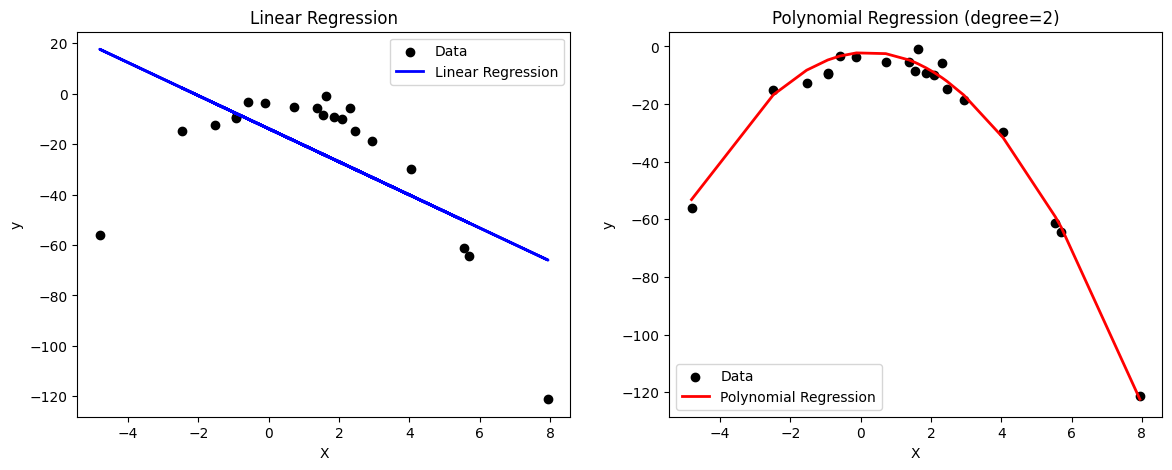

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Generate synthetic data
np.random.seed(0)
X = 2 - 3 * np.random.normal(0, 1, 100)
y = X - 2 * (X ** 2) + np.random.normal(-3, 3, 100)

X = X[:, np.newaxis]

# Split the data into training/testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 1. Linear Regression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)  # Train the model

# Predict using the linear model
y_pred_linear = linear_regressor.predict(X_test)

# 2. Polynomial Regression (degree 2)
polynomial_features = PolynomialFeatures(degree=2)
X_poly = polynomial_features.fit_transform(X_train)

poly_regressor = LinearRegression()
poly_regressor.fit(X_poly, y_train)  # Train the model

# Predict using the polynomial model
X_test_poly = polynomial_features.transform(X_test)
y_pred_poly = poly_regressor.predict(X_test_poly)

# Evaluate the models
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Linear Regression MSE: {mse_linear}, R2: {r2_linear}")
print(f"Polynomial Regression MSE: {mse_poly}, R2: {r2_poly}")

# Visualize the results
plt.figure(figsize=(14, 5))

# Plot Linear Regression results
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='black', label='Data')
plt.plot(X_test, y_pred_linear, color='blue', linewidth=2, label='Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()

# Plot Polynomial Regression results
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='black', label='Data')
# Sort the values of X_test for a smoother curve
sorted_X_test = np.sort(X_test, axis=0)
sorted_y_pred_poly = poly_regressor.predict(polynomial_features.transform(sorted_X_test))
plt.plot(sorted_X_test, sorted_y_pred_poly, color='red', linewidth=2, label='Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression (degree=2)')
plt.legend()

plt.show()


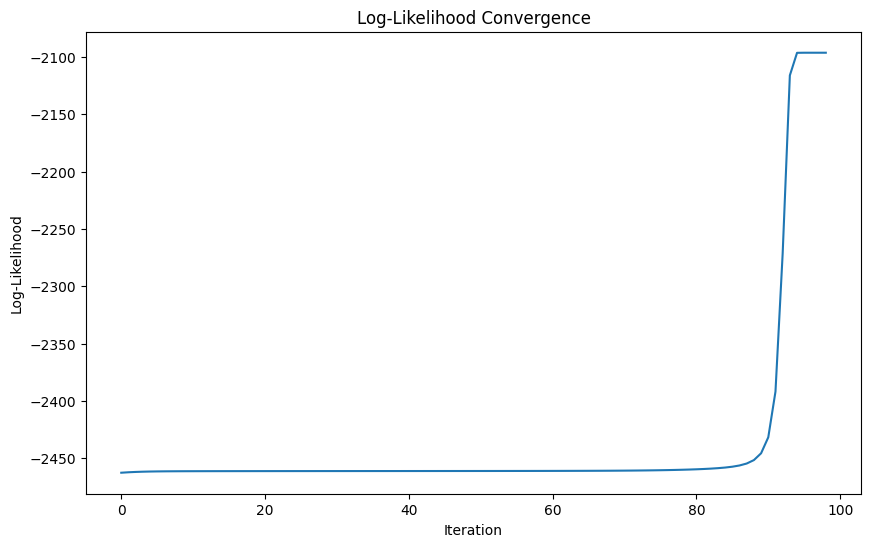

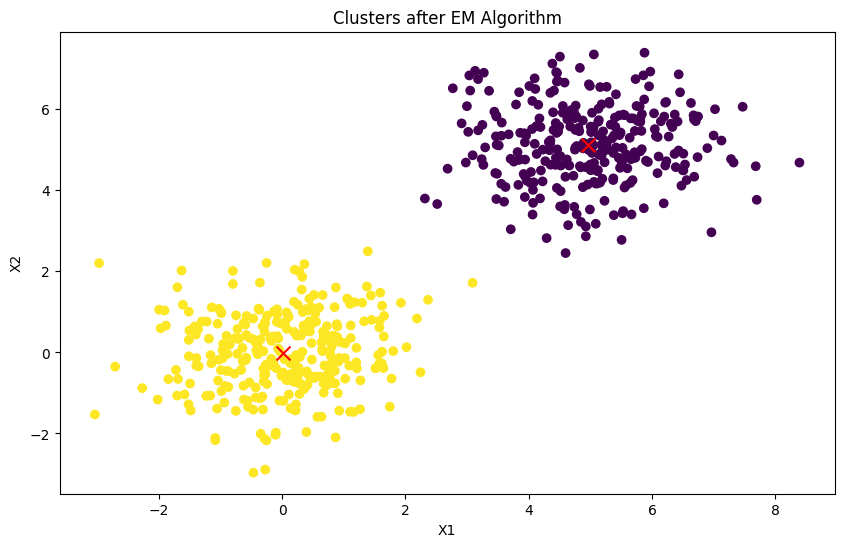

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Generate synthetic data
np.random.seed(42)
n_samples = 300
mean1 = [0, 0]
cov1 = [[1, 0.1], [0.1, 1]]
mean2 = [5, 5]
cov2 = [[1, -0.1], [-0.1, 1]]

X = np.vstack([
    np.random.multivariate_normal(mean1, cov1, n_samples),
    np.random.multivariate_normal(mean2, cov2, n_samples)
])

# Number of components
k = 2

# Initialize the parameters
np.random.seed(42)
pi = np.ones(k) / k  # Mixing coefficients
means = np.random.rand(k, 2)  # Means of the Gaussians
covariances = np.array([np.eye(2)] * k)  # Covariances of the Gaussians

def e_step(X, pi, means, covariances):
    N = X.shape[0]
    r = np.zeros((N, k))

    for i in range(k):
        r[:, i] = pi[i] * multivariate_normal.pdf(X, mean=means[i], cov=covariances[i])
    r = r / r.sum(axis=1, keepdims=True)
    return r

def m_step(X, r):
    N, D = X.shape
    pi = r.sum(axis=0) / N
    means = np.dot(r.T, X) / r.sum(axis=0)[:, np.newaxis]
    covariances = np.zeros((k, D, D))

    for i in range(k):
        diff = X - means[i]
        covariances[i] = np.dot(r[:, i] * diff.T, diff) / r[:, i].sum()

    return pi, means, covariances

def log_likelihood(X, pi, means, covariances):
    N = X.shape[0]
    log_likelihood = 0

    for i in range(k):
        log_likelihood += pi[i] * multivariate_normal.pdf(X, mean=means[i], cov=covariances[i])
    return np.log(log_likelihood).sum()

# Run the EM algorithm
max_iter = 100
tol = 1e-6
log_likelihoods = []

for iteration in range(max_iter):
    r = e_step(X, pi, means, covariances)
    pi, means, covariances = m_step(X, r)
    log_likelihoods.append(log_likelihood(X, pi, means, covariances))

    # Check for convergence
    if iteration > 0 and abs(log_likelihoods[-1] - log_likelihoods[-2]) < tol:
        break

# Plot the log-likelihoods
plt.figure(figsize=(10, 6))
plt.plot(log_likelihoods)
plt.xlabel('Iteration')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood Convergence')
plt.show()

# Plot the final clusters
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=r.argmax(axis=1), cmap='viridis', marker='o')
plt.scatter(means[:, 0], means[:, 1], c='red', marker='x', s=100)
plt.title('Clusters after EM Algorithm')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()
